In [45]:
# Modules

# Load module to create Panda DataFrames in Jupyter Notebooks
import pandas as pd
# Load module to create and format various plots
import matplotlib.pyplot as plt
# Load module to handle high-level math functions and basic algebraz
import numpy as np
# Load module to allow communication with HTTPS for API requests
import requests
# Load module that deserializes java script open notation into Jupyter Notebooks
import json
# Load module that returns the number of seconds passed since epoch 
import time
# Load module that contains probability distributions and statistical functions
from scipy.stats import linregress
# Load module for plot aesthetics
import seaborn as sns
# Load gmaps and configure API key
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
#Import CSVs and convert to DataFrames
fertility_csv = "clean_data/fertility_clean.csv"
fertility_clean = pd.read_csv(fertility_csv)

correlation_csv = "clean_data/fertility_literacy.csv"
correlation_df = pd.read_csv(correlation_csv)

corrWcon_csv = "clean_data/fertility_continents.csv"
corrWcon_df = pd.read_csv(corrWcon_csv)

replacement_csv = "clean_data/replacement.csv"
replacement_df = pd.read_csv(replacement_csv)

In [3]:
# Total Fertility by Country
# Define variable name that holds csv file location of the fertility rates
tot_fertility = "csv_files/testupdate.csv"
# Define variable name the holds the read information from the csv file
tot_fertility_df = pd.read_csv(tot_fertility)

#Total Fertility by Ages
age_fert_df = tot_fertility_df.loc[((tot_fertility_df["Reference Year"]==2005) | (tot_fertility_df["Reference Year"]==2006)
                                           |(tot_fertility_df["Reference Year"]==2007)) |(tot_fertility_df["Reference Year"]==2008)
                                            |(tot_fertility_df["Reference Year"]==2009)]


age_fert_df = age_fert_df.groupby('Reference Year').agg({'15-19': ['mean'], '20-24': ['mean'], '25-29': ['mean'],
                                                  '30-34': ['mean'], '35-39': ['mean'], '40-44': ['mean'],
                                                  '45-49': ['mean']})

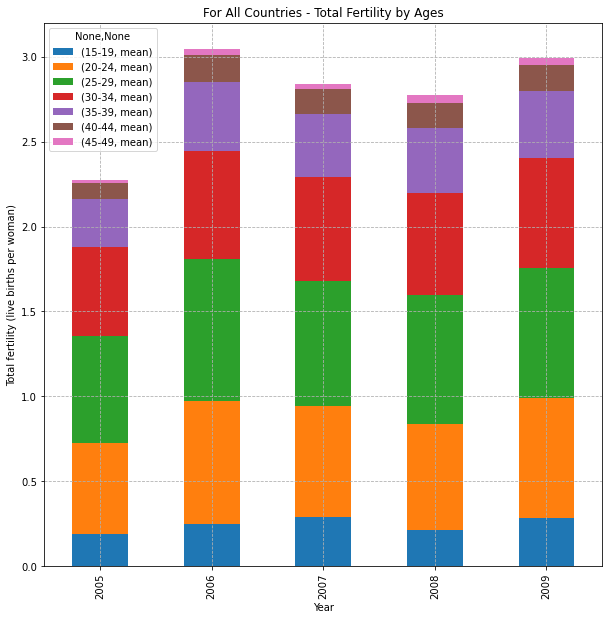

In [4]:
age_fert_df.plot.bar(stacked=True, figsize = (10,10))
plt.xlabel("Year")
plt.ylabel("Total fertility (live births per woman)")
plt.title("For All Countries - Total Fertility by Ages")
plt.grid(True, linestyle='--')
plt.savefig('Age_fert_rate_chart', transparent=True, bbox_inches='tight')
plt.show()                     

In [5]:
#Total Fertility Rate
one_fert_df = tot_fertility_df.loc[((tot_fertility_df["Reference Year"]==2005) | (tot_fertility_df["Reference Year"]==2006)
                                           |(tot_fertility_df["Reference Year"]==2007)) |(tot_fertility_df["Reference Year"]==2008)
                                            |(tot_fertility_df["Reference Year"]==2009)]


one_fert_df = one_fert_df.groupby('Reference Year').agg({'Total Fertility': ['mean']})


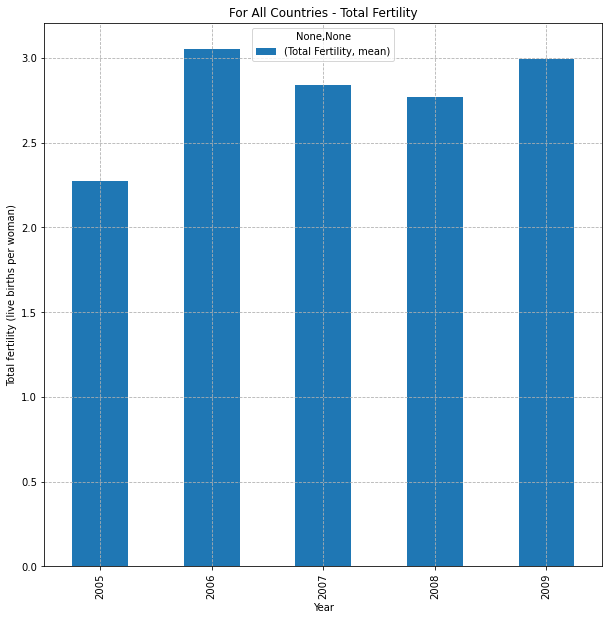

In [6]:
one_fert_df.plot.bar(stacked=True, figsize = (10,10))
plt.xlabel("Year")
plt.ylabel("Total fertility (live births per woman)")
plt.title("For All Countries - Total Fertility")
plt.grid(True, linestyle='--')
plt.savefig('One_fert_rate_chart', transparent=True, bbox_inches='tight')
plt.show()  

In [7]:
# Define variable that holds the csv file path to the education spend data
percent_gdp_education_spend_file = fertility_csv = "csv_files/country_list_education_spend_by_percent_gdp.csv"
# Define variable that holds the read csv pandas dataframe information
education_spend_dataframe = pd.read_csv(percent_gdp_education_spend_file)

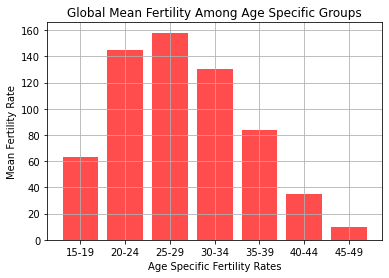

In [8]:
# Mathew's Age Specific Mean Bar Chart:

# Define base chart properties
# Define variable for the name of the cities "city_names"
age_specific_fertility = ["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49"]
# Define variable for plot points that correspond to the city names
age_specific_mean = [63, 145, 158, 130, 84, 35, 10]
# Use numpy libraries built in function arange (np.arange) to build a graph
x_axis_age_specific = np.arange(len(age_specific_mean))
plt.bar(x_axis_age_specific, age_specific_mean, color="r", alpha=0.7, align="center")
plt.grid()
# Define variable that holds tick value placement in a chart on x_axis_np chart
chart_ticks = [value for value in x_axis_age_specific]
# Now, use the function to call the defined variables "chart_ticks" and "city_names"
plt.xticks(chart_ticks, age_specific_fertility)
plt.title("Global Mean Fertility Among Age Specific Groups")
plt.xlabel("Age Specific Fertility Rates")
plt.ylabel("Mean Fertility Rate")
plt.savefig('Mean_Fertility_Rate_All_Countries')
plt.show()

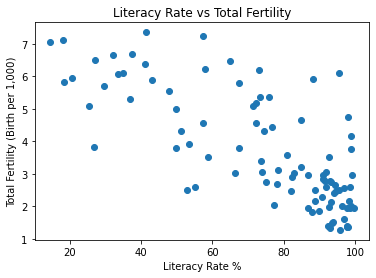

In [9]:
# Load module for plot aesthetics
import seaborn as sns

# Scatter Plot:

# Use Matplotlib to create scatter plot and format
plt.scatter(correlation_df["Literacy Rate"],
           correlation_df["Total Fertility"], marker="o")
# Create a unique plot title
plt.title('Literacy Rate vs Total Fertility')
# Create a lable for the y axis
plt.ylabel("Total Fertility (Birth per 1,000)")
# Create a lable for the x axis
plt.xlabel("Literacy Rate %")
# Save a png image of the scatter plot to local folder
plt.savefig('literacy_rates_vs_total_fertility')
# Print scatter plot to screen

plt.show()


### Linear Regressions

In [10]:
# Linear Regression Passthrough:

# Use Python define function (def) to start a linear regression function 
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue}")
    print(f"Intercept: {intercept}")
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=20,color="black")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)

The r-squared is: 0.2793778965263324
Intercept: 28.188115239689832


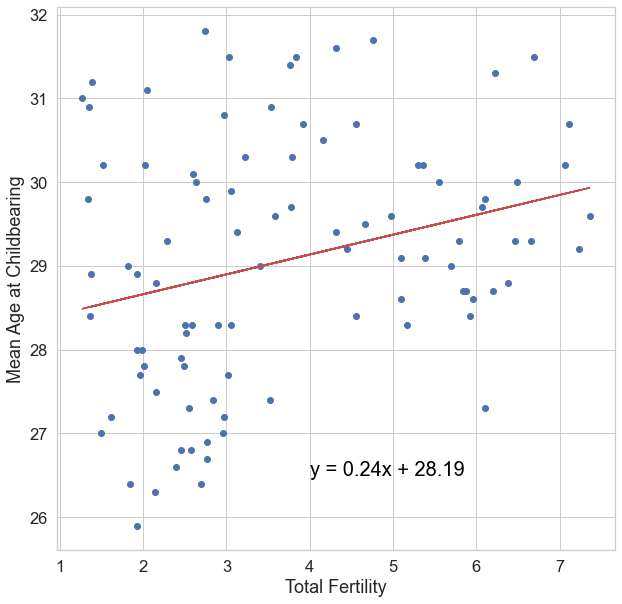

In [28]:
ylbl = "Mean Age at Childbearing"
xlbl = "Total Fertility"
sns.set(font_scale=1.5, style='whitegrid')
lblpos = (4,26.5)
plt.figure(figsize=(10,10))
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)
plt.savefig('./Charts/LinearReg_AgeVFert')

The r-squared is: -0.7489005930271825
Intercept: 7.657954805495637


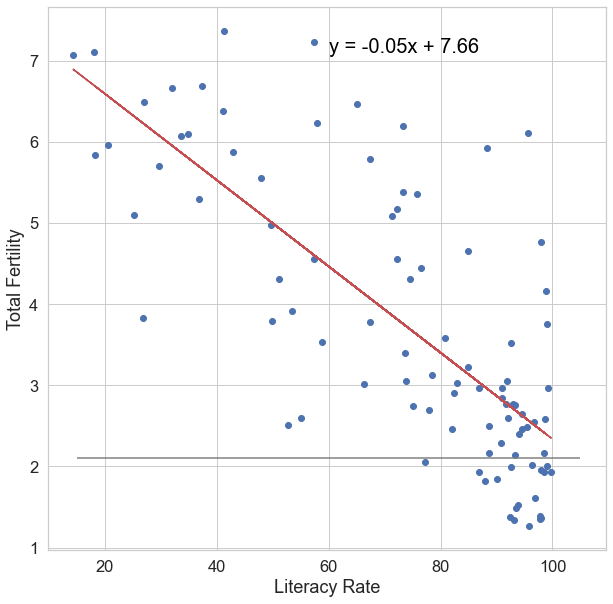

In [27]:
xlbl = "Literacy Rate"
ylbl = "Total Fertility"
lblpos = (60,7.1)
sns.set(font_scale=1.5, style='whitegrid')
plt.figure(figsize=(10,10))
plt.hlines(y=2.1,color="gray",xmin=15, xmax=105)
plotLinearRegression(correlation_df[xlbl],correlation_df[ylbl],xlbl,ylbl,lblpos)
plt.savefig('./Charts/LinearReg_FertVLit')

#### Linear Regression Observation:
This linear regression line shows that there is a strong correlation between the fertility rate and literacy rates.  It might be helpful to compare other factors to the fertility rate such as age, country and income to see how they compare.

In [19]:
#Sepertating countries at the 2.1 Replacement Fertility Rate
last_below_rep=replacement_df.loc[replacement_df["Replacement Fertility Rate"]=="Below 2.1"]
last_ab_rep=replacement_df.loc[replacement_df["Replacement Fertility Rate"]=="Above 2.1"]

The r-squared is: -0.10768225593081858
Intercept: 29.82874060554283


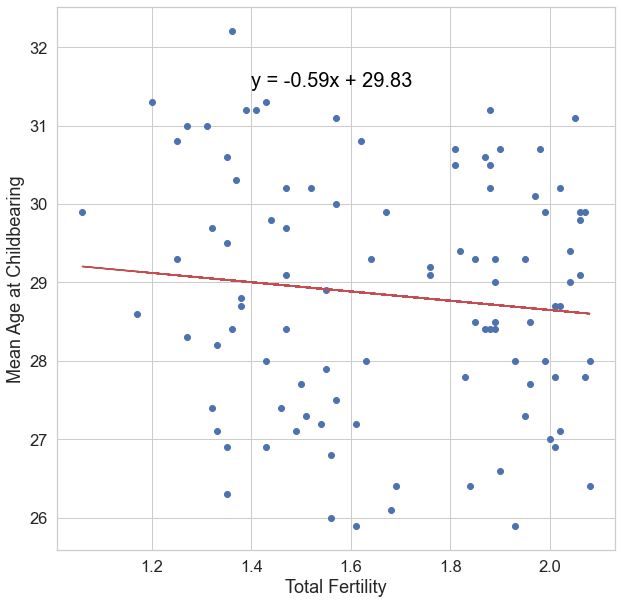

In [29]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (1.4,31.5)
sns.set(font_scale=1.5, style='whitegrid')
plt.rcParams["figure.figsize"] = 10,10
plotLinearRegression(last_below_rep[xlbl],last_below_rep[ylbl],xlbl,ylbl,lblpos)
plt.savefig('./Charts/LinearReg_AgeVFert_Below_Rep.png')

The r-squared is: 0.450553948294075
Intercept: 26.508300932200964


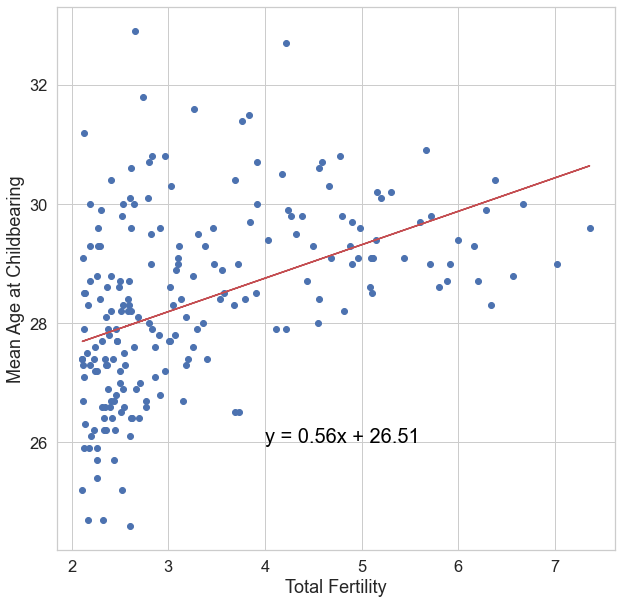

In [44]:
xlbl = "Total Fertility"
ylbl = "Mean Age at Childbearing"
lblpos = (4,26)
sns.set(font_scale=1.5, style='whitegrid')
plotLinearRegression(last_ab_rep[xlbl],last_ab_rep[ylbl],xlbl,ylbl,lblpos)
plt.rcParams["figure.figsize"] = 10,10
plt.savefig('./Charts/LinearReg_AgeVFert_Above_Rep.png')

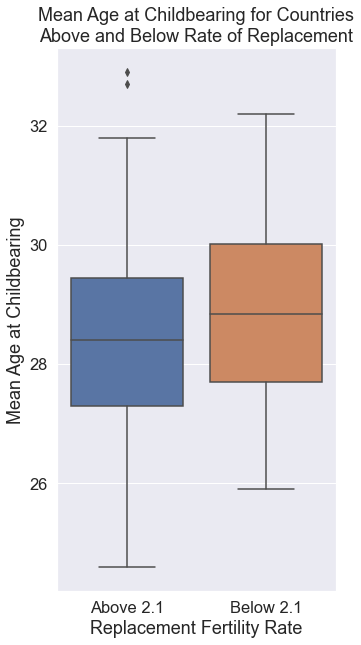

In [42]:
# create df that are greater than 2.1 fertilty rates in one group and less than or equal to 2.1 fertality rates
plt.figure(figsize=(5,10))
sns.set(font_scale=1.5)
sns.boxplot(x="Replacement Fertility Rate", y="Mean Age at Childbearing", data=replacement_df)
plt.title("Mean Age of Childbearing for Countries\nAbove and Below Rate of Replacement")
plt.savefig('./Charts/Mean_Age_VS_Replacement.png')

## Fertility/Literacy Data Seperated by Continent

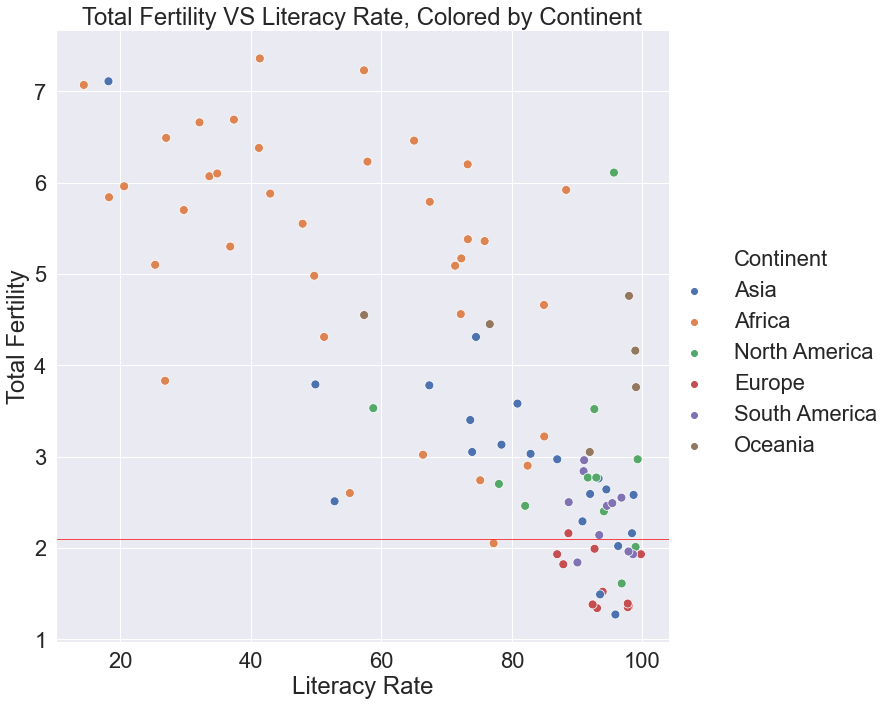

In [38]:
sns.set(font_scale=2, style='darkgrid')
chart = sns.relplot(data=corrWcon_df, s=80, x="Literacy Rate", y="Total Fertility",
                    hue="Continent",height=10, aspect=10/10)
chart.axes[0][0].axhline(y = 2.1, color='red', linewidth=1, alpha=.7)
plt.title("Total Fertility VS Literacy Rate, Colored by Continent")
plt.savefig('./Charts/Tot_Fert_VS_Literacy_Colors.png')

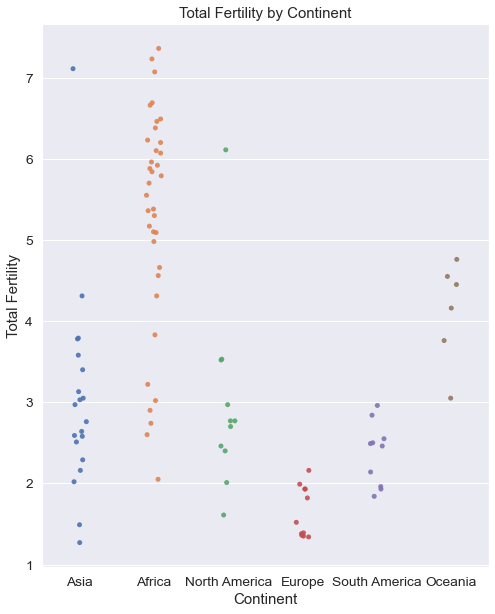

In [36]:
plt.figure(figsize=(8,10))
sns.set(font_scale=1.25)
bplot=sns.stripplot(y='Total Fertility', x='Continent', 
                   data=corrWcon_df, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.9)
plt.title("Total Fertility by Continent")
plt.savefig('./Charts/Total_Fertility_By_Continent.png')

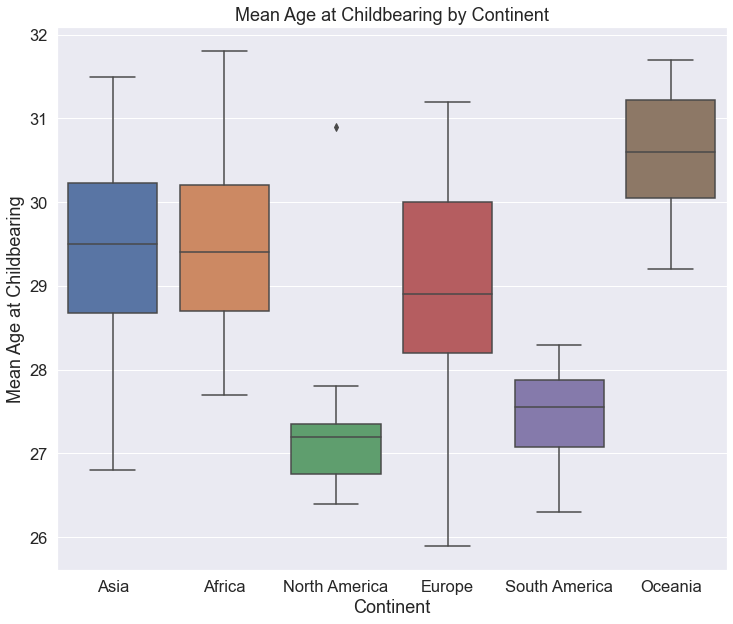

In [35]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
sns.boxplot(x="Continent", y="Mean Age at Childbearing", data=corrWcon_df)
plt.title("Mean Age at Childbearing by Continent")
plt.savefig('./Charts/Mean_Age_By_Continent_Box.png')

In [46]:
country_df = pd.read_csv('country capitals coordinates.csv')
fertility_rates_df = pd.read_csv('csv_files/Age-specific fertility rates, Total fertility and .csv')
total_fertility_df = fertility_rates_df.loc[:, ["United Nations, Department of Economic and Social Affairs", "Unnamed: 5"]]
total_fertility_clean = total_fertility_df.loc[4:1074, "United Nations, Department of Economic and Social Affairs":"Unnamed: 5"]
total_fertility_renamed = total_fertility_clean.rename(columns={"United Nations, Department of Economic and Social Affairs": "country", "Unnamed: 5": "fertility"})
clean_total_fertility = total_fertility_renamed.loc[total_fertility_renamed['fertility'] != '..']
clean_total_fertility["fertility"] = clean_total_fertility["fertility"].astype('float')
total_fertility_groups = clean_total_fertility.groupby(["country"])
unique_countries_fertility = total_fertility_groups["fertility"].mean()
unique_countries_fertility = unique_countries_fertility.reset_index()
combined_data_df = unique_countries_fertility.merge(country_df, left_on="country", right_on="CountryName")
fertility = combined_data_df["fertility"]
combined_data_df["CapitalLatitude"] = combined_data_df["CapitalLatitude"].astype('float')
combined_data_df["CapitalLongitude"] = combined_data_df["CapitalLongitude"].astype('float')
capitals = combined_data_df[["CapitalLatitude", "CapitalLongitude"]]
capitals_df = capitals.dropna(how='any')

<ipython-input-46-efe98bd47219>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_total_fertility["fertility"] = clean_total_fertility["fertility"].astype('float')


In [47]:
fig = gmaps.figure()


heat_layer = gmaps.heatmap_layer(capitals, weights=fertility*15,
                                 dissipating=False, 
                                max_intensity=50,
                                 point_radius=2)



fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))